In [ ]:
# Duomenys:
# https://data.gov.lt/datasets/2829/
# - Stacionaro ir ambulatoriniai ligoniai, gydyti nuo traumų ir
# apsinuodijimų. Įvertinkite patiriamų traumų, apsinuodijimų
# dažnius/pasiskirstymą, sunkumą pagal amžių/amžiaus
# grupes, lytį, paros, metų, darbo dienų/švenčių/išeiginių. Ar
# traumų pobūdis/dažnis, apsinuodijimų kiekis, pobūdis, sunkumas
# priklauso nuo užfiksuotų meteorologinių sąlygų, mėnulio fazės,
# švenčių/laisvadienių?

https://data.gov.lt/datasets/2829/data/Ligonine/ 

https://data.gov.lt/datasets/2829/data/Pacientas/ 

https://ligoniukasa.lrv.lt/uploads/ligoniukasa/documents/files/1(9).xlsx 


# Duomenys:
# https://data.gov.lt/datasets/2793/#info
# – PAGD iškvietimai; https://data.gov.lt/datasets/1667/#info
# – Policijos
# iškvietimai. Ar
# iškvietimų dažnis/kiekis priklauso nuo paros,
# metų, darbo dienų/švenčių/išeiginių, mėnulio
# fazės, švenčių/laisvadienių?
# Mėnulio
# fazės turi būti pasiekiamos per http užklausas – iš esmės
# pasinaudojate web scrapingu, kad gautumėte norimą informaciją.
# Papildoma informacija -
# https://ligoniukasa.lrv.lt/lt/veiklos-sritys/informacija-gyventojams/gydymo-ir-sveikatos-prieziuros-paslaugos/stebejimo-paslaugos/
# ;

# https://astropixels.com/ephemeris/phasescat/phasescat.html


# TLK kodų paaiškinimai yra šiame excel faile:
# https://ligoniukasa.lrv.lt/uploads/ligoniukasa/documents/files/1(9).xlsx

# Jūs turėsite sujungti tris failus:
# https://data.gov.lt/datasets/2829/data/Pacientas/
# https://data.gov.lt/datasets/2829/data/Ligonine/
# ir pateiktą excel'io failą, kad turėtumėte vientisą lentelę su reikiamais duomenimis.
# Prie jų jungsite infromaciją iš
# https://astropixels.com/ephemeris/phasescat/phasescat.html
# ARBA day.lt - bus paprasčiau:
# https://day.lt/diena/2021.04.22    <--- adreso laukelyje įrašius norimą datą, gaunama informacija apie tą dieną.

# iš kurios, naudodami web scraping'ą, išgausite reikiamą informaciją apie fazes. (requests bibliotekos užteks)

In [ ]:
# siuncia tiesiai i pythono instancija
# import requests
# r = requests.get('https://get.data.gov.lt/datasets/gov/hi/traumos_apsinuodijimai/Pacientas')
# ats = r.json()
# pandas_df = pd.DataFrame(data=ats["_data"])
# pandas_df.head()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from datetime import datetime
import requests
from bs4 import BeautifulSoup

In [2]:
paci = pd.read_csv('../../../eismas/Pacientas.csv')
print('Nuskaityta 1')
# lig = pd.read_csv('../../../eismas/Ligonine.csv')
# print('Nuskaityta 2')
tlk = pd.read_excel('../../../eismas/LigoninePacientas.xlsx')
print('Nuskaityta 3')


Nuskaityta 1
Nuskaityta 3


In [3]:
paci.head(2)

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,savivaldybe,gyvenviete,gydymas,stacionaro_tipas,tlk_trauma,tlk_aplinkybe,tlk_veikla,tlk_vieta
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,Kretingos r. sav.,Nežinoma,Ambulatorinis,NaN,S42.43,NaN,NaN,NaN
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,Vilniaus r. sav.,Kaimas,Ambulatorinis,NaN,S13.6,W22,U54.08,Y92.80


In [10]:
paci.columns

Index(['_type', '_id', '_revision', '_page.next', 'vda_pk', 'paciento_id',
       'atvejo_id', 'gyd_lap_pradzia', 'lytis', 'vda_gim_metai', 'savivaldybe',
       'gyvenviete', 'gydymas', 'stacionaro_tipas', 'tlk_trauma',
       'tlk_aplinkybe', 'tlk_veikla', 'tlk_vieta'],
      dtype='object')

In [4]:
laikai = paci['gyd_lap_pradzia'].unique().tolist()
print(len(laikai))
print(laikai)

151
['2013-01-01', '2022-08-01', '2018-02-01', '2015-08-01', '2015-10-01', '2021-09-01', '2015-12-01', '2014-05-01', '2023-10-01', '2022-06-01', '2019-02-01', '2017-08-01', '2014-11-01', '2021-07-01', '2019-11-01', '2023-05-01', '2020-07-01', '2014-01-01', '2018-05-01', '2019-06-01', '2016-07-01', '2013-06-01', '2015-04-01', '2023-08-01', '2013-09-01', '2018-08-01', '2013-10-01', '2018-10-01', '2018-04-01', '2022-04-01', '2014-08-01', '2021-01-01', '2023-09-01', '2016-04-01', '2013-07-01', '2014-09-01', '2023-01-01', '2015-06-01', '2019-08-01', '2021-03-01', '2019-04-01', '2022-01-01', '2022-09-01', '2020-02-01', '2016-06-01', '2017-05-01', '2015-01-01', '2019-05-01', '2014-07-01', '2015-09-01', '2023-07-01', '2020-04-01', '2018-12-01', '2014-04-01', '2022-07-01', '2017-12-01', '2012-02-01', '2013-11-01', '2015-05-01', '2023-06-01', '2020-11-01', '2020-09-01', '2021-02-01', '2021-05-01', '2015-02-01', '2016-08-01', '2013-12-01', '2017-07-01', '2021-12-01', '2018-03-01', '2021-04-01', '

In [5]:
savivaldybes = paci['savivaldybe'].unique().tolist()
print(len(savivaldybes))
# pasalinam nan
savivaldybes2 = [sav for sav in savivaldybes if not isinstance(sav, float)]
print(len(savivaldybes2))
# print(savivaldybes)

61
60


In [12]:
url = 'https://day.lt/diena/2025.02.05'

source = requests.get(url)
status = source.status_code
print(status)
# r = page.json()

200


In [20]:
# Check if the request was successful
if source.status_code == 200:
    bs = BeautifulSoup(source.text, 'html.parser')
    
    menulis = bs.find('ul', {'title':'Mėnulis'}).find('a', {'title':'Apie dabartinį mėnulį'})
    print(menulis.text)

else:
    print(f"Failed to retrieve the page. Status code: {source.status_code}")

Priešpilnis


In [6]:
fazes = {}

for laikas in laikai:
    l = laikas.replace('-', '.')
    # print(l)

    url = f'https://day.lt/diena/{l}'
    source = requests.get(url)

    if source.status_code == 200:
        bs = BeautifulSoup(source.text, 'html.parser')
        
        menulis = bs.find('ul', {'title':'Mėnulis'}).find('a', {'title':'Apie dabartinį mėnulį'})
        # print(menulis.text)

        fazes[laikas] = menulis.text

    else:
        print(f"Failed to retrieve the page. Status code: {source.status_code}")
    



In [7]:
print(set(fazes.values()))


{'Jaunatis', 'Delčia (dylantis)', 'Jaunatis (pilnėja)', 'Priešpilnis', 'Delčia', 'Priešpilnis (pilnėja)', 'Delčia (dyla)', 'Pilnatis'}


In [8]:
fazes1 = {key: value.replace('Jaunatis (pilnėja)', 'Jaunatis')
          .replace('Delčia (dylantis)', 'Delčia')
          .replace('Delčia (dyla)', 'Delčia')
          .replace('Priešpilnis (pilnėja)', 'Priešpilnis') for key, value in fazes.items()}
# fazes2 = {key: value.replace('Delčia (dylantis)', 'Delčia') for key, value in fazes.items()}

In [9]:
print(set(fazes1.values()))

{'Priešpilnis', 'Pilnatis', 'Jaunatis', 'Delčia'}


In [10]:
paci['iv_data'] = pd.to_datetime(paci['gyd_lap_pradzia'])
paci['moon'] = paci['iv_data'].dt.strftime('%Y-%m-%d').map(fazes1)
paci.head(2)


,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,savivaldybe,gyvenviete,gydymas,stacionaro_tipas,tlk_trauma,tlk_aplinkybe,tlk_veikla,tlk_vieta,iv_data,moon
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,Kretingos r. sav.,Nežinoma,Ambulatorinis,NaN,S42.43,NaN,NaN,NaN,2013-01-01,Pilnatis
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,Vilniaus r. sav.,Kaimas,Ambulatorinis,NaN,S13.6,W22,U54.08,Y92.80,2022-08-01,Jaunatis


In [11]:
a = paci.iloc[0, -2]
# a = paci.loc[0:1, ['iv_data': 'moon']]
print(a)
print(a.month)
print(a.year)
print(a.day)

2013-01-01 00:00:00
1
2013
1


In [12]:
# Function to determine season based on month
def get_sezonas(month):
    if month in [12, 1, 2]:
        return 'Žiema'
    elif month in [3, 4, 5]:
        return 'Pavasaris'
    elif month in [6, 7, 8]:
        return 'Vasara'
    elif month in [9, 10, 11]:
        return 'Ruduo'

# Create a new 'season' column based on the month
paci['sezonas'] = paci['iv_data'].dt.month.apply(get_sezonas)


In [13]:
paci['weekday'] = paci['iv_data'].dt.weekday
paci['arSavaitgalis'] = paci['weekday'].apply(lambda x: 'Taip' if x in [5, 6] else 'Ne')

In [14]:
paci['weekday'] = paci['weekday'].apply(lambda x: 'Pirmadienis' if x == 0 else 'Antradienis' if x == 1 else 'Trečiadienis' if x == 3 else
                                        'Ketvirtadienis' if x == 3 else 'Penktadienis' if x == 4 else
                                        'Šeštadienis' if x == 5 else 'Sekmadienis')

In [15]:
paci.head(2)

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,...,stacionaro_tipas,tlk_trauma,tlk_aplinkybe,tlk_veikla,tlk_vieta,iv_data,moon,sezonas,weekday,arSavaitgalis
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,...,NaN,S42.43,NaN,NaN,NaN,2013-01-01,Pilnatis,Žiema,Antradienis,Ne
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,...,NaN,S13.6,W22,U54.08,Y92.80,2022-08-01,Jaunatis,Vasara,Pirmadienis,Ne


In [17]:
tlk.columns

Index(['TLK-10-AM Kodas', 'TLK-10-AM Kodo pavadinimas', 'Kodo lygis',
       'Žvaigždutė', 'Apskritimas', 'Kryželis', 'Poskyrio eil. nr.',
       'Poskyrio blokas', 'Poskyrio pavadinimas', 'Skyriaus nr.',
       'Skyriaus blokas', 'Skyriaus pavadinimas', 'Data nuo', 'Data iki'],
      dtype='object')

In [16]:
# tlk (keli stulpeliai) prijungimas prie paci
# paci 'tlk_trauma'
# tlk 'TLK-10-AM Kodas', 'TLK-10-AM Kodo pavadinimas', 'Kodo lygis', 'Poskyrio pavadinimas'

# suvienodinam kodo stulpelio pavadinima
tlk = tlk.rename(columns={'TLK-10-AM Kodas': 'tlk_trauma'})

# prijungimas
paci = paci.merge(tlk[['tlk_trauma', 'TLK-10-AM Kodo pavadinimas', 'Kodo lygis', 'Poskyrio pavadinimas']], on='tlk_trauma', how='left')
paci.head(2)


,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,...,tlk_veikla,tlk_vieta,iv_data,moon,sezonas,weekday,arSavaitgalis,TLK-10-AM Kodo pavadinimas,Kodo lygis,Poskyrio pavadinimas
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,...,NaN,NaN,2013-01-01,Pilnatis,Žiema,Antradienis,Ne,Žastikaulio viduriniojo krumplio lūžis,3,PETIES IR ŽASTO SUŽALOJIMAI
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,...,U54.08,Y92.80,2022-08-01,Jaunatis,Vasara,Pirmadienis,Ne,Kitų ir nepatikslintų kaklo dalių sąnarių raiš...,2,KAKLO SUŽALOJIMAI


In [26]:
laikai

['2013-01-01',
 '2022-08-01',
 '2018-02-01',
 '2015-08-01',
 '2015-10-01',
 '2021-09-01',
 '2015-12-01',
 '2014-05-01',
 '2023-10-01',
 '2022-06-01',
 '2019-02-01',
 '2017-08-01',
 '2014-11-01',
 '2021-07-01',
 '2019-11-01',
 '2023-05-01',
 '2020-07-01',
 '2014-01-01',
 '2018-05-01',
 '2019-06-01',
 '2016-07-01',
 '2013-06-01',
 '2015-04-01',
 '2023-08-01',
 '2013-09-01',
 '2018-08-01',
 '2013-10-01',
 '2018-10-01',
 '2018-04-01',
 '2022-04-01',
 '2014-08-01',
 '2021-01-01',
 '2023-09-01',
 '2016-04-01',
 '2013-07-01',
 '2014-09-01',
 '2023-01-01',
 '2015-06-01',
 '2019-08-01',
 '2021-03-01',
 '2019-04-01',
 '2022-01-01',
 '2022-09-01',
 '2020-02-01',
 '2016-06-01',
 '2017-05-01',
 '2015-01-01',
 '2019-05-01',
 '2014-07-01',
 '2015-09-01',
 '2023-07-01',
 '2020-04-01',
 '2018-12-01',
 '2014-04-01',
 '2022-07-01',
 '2017-12-01',
 '2012-02-01',
 '2013-11-01',
 '2015-05-01',
 '2023-06-01',
 '2020-11-01',
 '2020-09-01',
 '2021-02-01',
 '2021-05-01',
 '2015-02-01',
 '2016-08-01',
 '2013-12-

In [17]:
# oro sąlygos

url = f'https://api.meteo.lt/v1/stations/vilniaus-ams/observations/2011-08-01'
source = requests.get(url)

if source.status_code == 200:
    print('all good')
    r = source.json()
    df = pd.DataFrame.from_dict(r['observations'])
    temp = round(df['airTemperature'].mean(), 1)
    oras = df['conditionCode'].mode()

else:
    print(f"Failed to retrieve the page. Status code: {source.status_code}")

Failed to retrieve the page. Status code: 404


In [18]:
# meteorologinės stotys
url = 'https://api.meteo.lt/v1/stations'
page = requests.get(url)
r = page.json()
df = pd.DataFrame(data=r)
stotys = df.loc[:,'code'].values
stotys

array(['akmenes-ams', 'alytaus-ams', 'anyksciu-ams', 'birstono-ams',
       'birzu-ams', 'dotnuvos-ams', 'druskininku-ams', 'duksto-ams',
       'elektrenu-ams', 'jonavos-ams', 'joniskio-ams', 'jurbarko-ams',
       'kaisiadoriu-ams', 'kalvarijos-ams', 'kauno-ams',
       'kazlu-rudos-ams', 'kelmes-ams', 'klaipedos-ams', 'kretingos-ams',
       'kupiskio-ams', 'kybartu-ams', 'laukuvos-ams', 'lazdiju-ams',
       'marijampoles-ams', 'mazeikiu-ams', 'moletu-ams', 'nidos-ams',
       'pagegiu-ams', 'pakruojo-ams', 'panevezio-ams', 'plunges-ams',
       'prienu-ams', 'raseiniu-ams', 'rietavo-ams', 'rokiskio-ams',
       'sakiu-ams', 'salcininku-ams', 'seduvos-ams', 'siauliu-ams',
       'silutes-ams', 'skuodo-ams', 'svencioniu-ams', 'taurages-ams',
       'telsiu-ams', 'traku-ams', 'ukmerges-ams', 'utenos-ams',
       'varenos-ams', 'ventes-ams', 'vezaiciu-ams', 'vilniaus-ams',
       'zarasu-ams'], dtype=object)

In [19]:
# Define the translation table
savs = []
trans_table = str.maketrans('ąčęėįšųūžĄČĘĖĮŠŲŪŽ', 'aceeisuuzACEEISUUZ')
for sav in savivaldybes:
    if sav is np.nan:
        continue
    else:
        sav = sav.translate(trans_table)
        sav = sav.lower()
        savs.append(sav)


print(savs)


['kretingos r. sav.', 'vilniaus r. sav.', 'joniskio r. sav.', 'svencioniu r. sav.', 'vilniaus m. sav.', 'kaunas', 'lazdiju r. sav.', 'pakruojo r. sav.', 'panevezys', 'varenos r. sav.', 'klaipeda', 'prienu r. sav.', 'ukmerges r. sav.', 'panevezio r. sav.', 'kauno r. sav.', 'vilkaviskio r. sav.', 'sakiu r. sav.', 'klaipedos r. sav.', 'alytus', 'rokiskio r. sav.', 'silales r. sav.', 'kaisiadoriu r. sav.', 'utenos r. sav.', 'silutes r. sav.', 'kedainiu r. sav.', 'raseiniu r. sav.', 'jonavos r. sav.', 'salcininku r. sav.', 'taurages r. sav.', 'siauliu r. sav.', 'mazeikiu r. sav.', 'moletu r. sav.', 'siauliai', 'alytaus r. sav.', 'elektrenu sav.', 'sirvintu r. sav.', 'pasvalio r. sav.', 'radviliskio r. sav.', 'kazlu rudos sav.', 'plunges r. sav.', 'akmenes r. sav.', 'birzu r. sav.', 'anyksciu r. sav.', 'telsiu r. sav.', 'kelmes r. sav.', 'neringa', 'skuodo r. sav.', 'kupiskio r. sav.', 'marijampoles sav.', 'traku r. sav.', 'rietavo sav.', 'zarasu r. sav.', 'palanga', 'pagegiu sav.', 'visagin

In [20]:
def make_savs_lt_zenklu(x):
    trans_table = str.maketrans('ąčęėįšųūžĄČĘĖĮŠŲŪŽ', 'aceeisuuzACEEISUUZ')
    if x is np.nan:
        return x
    else:
        x = x.translate(trans_table)
        x = x.lower()
        return x[:4]
    
paci['savs'] = paci['savivaldybe'].apply(make_savs_lt_zenklu)
paci.head()
    

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,...,tlk_vieta,iv_data,moon,sezonas,weekday,arSavaitgalis,TLK-10-AM Kodo pavadinimas,Kodo lygis,Poskyrio pavadinimas,savs
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,...,NaN,2013-01-01,Pilnatis,Žiema,Antradienis,Ne,Žastikaulio viduriniojo krumplio lūžis,3,PETIES IR ŽASTO SUŽALOJIMAI,kret
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,...,Y92.80,2022-08-01,Jaunatis,Vasara,Pirmadienis,Ne,Kitų ir nepatikslintų kaklo dalių sąnarių raiš...,2,KAKLO SUŽALOJIMAI,viln
2,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,7d22da6d-dfb8-4bd5-9c4b-36dabe315f82,473c4758-d29a-406c-adea-ab45fac20281,NaN,000007b72b89c6f,0b3be641d2592a7,83c3433681a89c7,2018-02-01,Moteris,1960-01-01,...,Y92.9,2018-02-01,Pilnatis,Žiema,Trečiadienis,Ne,"Riešo patempimas, dalis nepatikslinta",3,RIEŠO IR PLAŠTAKOS SUŽALOJIMAI,joni
3,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,aa244a78-c3bb-4b35-b1c0-e5291c53d565,c40f3e7f-ba0f-4fbf-8870-dd36d53af04f,NaN,00000910f8f3fe6,2c263440a0644ca,0207d6ff149014d,2015-08-01,Vyras,1978-01-01,...,Y92.09,2015-08-01,Pilnatis,Vasara,Šeštadienis,Taip,Dviejų ar daugiau pirštų trauminė amputacija (...,2,RIEŠO IR PLAŠTAKOS SUŽALOJIMAI,sven
4,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,af5347d1-6217-4be8-8840-7593155c6e42,319ab030-b327-4f1b-abc3-ab3cedeadfe7,NaN,00000b8d423c882,aa1ac176d5137aa,8f968c2f1adeef2,2015-10-01,Vyras,2011-01-01,...,Y92.9,2015-10-01,Pilnatis,Ruduo,Trečiadienis,Ne,"Svetimkūnis virškinimo trakte, dalis nepatiksl...",2,"SVETIMKŪNIŲ, PATEKUSIŲ PRO NATŪRALIAS ANGAS, P...",viln


In [58]:
trans_table = str.maketrans('ąčęėįšųūžĄČĘĖĮŠŲŪŽ', 'aceeisuuzACEEISUUZ')
text = 'Švenčionių r. sav.'
trans = text.translate(trans_table).lower()
print(trans)

svencioniu r. sav.


In [22]:
print(len(savs))
print(len(stotys))
# stotys = list(stotys)
# stotys.append('a')
# stotys.append('a')
# stotys.append('a')
# stotys.append('a')
# stotys.append('a')
# stotys.append('a')
# stotys.append('a')
# stotys.append('a')
# print(len(savs))
# print(len(stotys))


60
52


In [21]:

sav_stotys = {}
for sav in savivaldybes:
    if sav is not np.nan:
        for st  in stotys:
            if sav.lower()[:4] == st[:4]:
                sav = sav.lower()
                sav_stotys[sav[:4]] = st

print(sav_stotys)

# print(sav_stotys.items())


{'kret': 'kretingos-ams', 'viln': 'vilniaus-ams', 'joni': 'joniskio-ams', 'kaun': 'kauno-ams', 'lazd': 'lazdiju-ams', 'pakr': 'pakruojo-ams', 'pane': 'panevezio-ams', 'klai': 'klaipedos-ams', 'prie': 'prienu-ams', 'ukme': 'ukmerges-ams', 'alyt': 'alytaus-ams', 'roki': 'rokiskio-ams', 'uten': 'utenos-ams', 'rase': 'raseiniu-ams', 'jona': 'jonavos-ams', 'taur': 'taurages-ams', 'elek': 'elektrenu-ams', 'kazl': 'kazlu-rudos-ams', 'plun': 'plunges-ams', 'akme': 'akmenes-ams', 'anyk': 'anyksciu-ams', 'kelm': 'kelmes-ams', 'skuo': 'skuodo-ams', 'kupi': 'kupiskio-ams', 'mari': 'marijampoles-ams', 'trak': 'traku-ams', 'riet': 'rietavo-ams', 'zara': 'zarasu-ams', 'jurb': 'jurbarko-ams', 'drus': 'druskininku-ams', 'kalv': 'kalvarijos-ams'}


In [22]:
paci['stotis'] = paci['savs'].apply(lambda x: sav_stotys[x] if x in sav_stotys.keys() else x)
paci.head(2)

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,...,iv_data,moon,sezonas,weekday,arSavaitgalis,TLK-10-AM Kodo pavadinimas,Kodo lygis,Poskyrio pavadinimas,savs,stotis
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,...,2013-01-01,Pilnatis,Žiema,Antradienis,Ne,Žastikaulio viduriniojo krumplio lūžis,3,PETIES IR ŽASTO SUŽALOJIMAI,kret,kretingos-ams
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,...,2022-08-01,Jaunatis,Vasara,Pirmadienis,Ne,Kitų ir nepatikslintų kaklo dalių sąnarių raiš...,2,KAKLO SUŽALOJIMAI,viln,vilniaus-ams


In [25]:
laikSt = paci[paci['stotis'].str.contains('ams', na=False)][['gyd_lap_pradzia', 'stotis']]
laikSt.head(2)

,gyd_lap_pradzia,stotis
0,2013-01-01,kretingos-ams
1,2022-08-01,vilniaus-ams


In [26]:
laikSt2 = laikSt.drop_duplicates()
laikSt2.head()

,gyd_lap_pradzia,stotis
0,2013-01-01,kretingos-ams
1,2022-08-01,vilniaus-ams
2,2018-02-01,joniskio-ams
4,2015-10-01,vilniaus-ams
5,2021-09-01,kauno-ams


In [31]:
temperatura = {}
sky = {}

# Iterating through each row
for index, row in laikSt2.iterrows():
    date = row['gyd_lap_pradzia']
    station = row['stotis']
    key = (date, station)  
    
    url = f'https://api.meteo.lt/v1/stations/{station}/observations/{date}'
    source = requests.get(url)

    if source.status_code == 200:
        # print('all good')
        r = source.json()
        df = pd.DataFrame.from_dict(r['observations'])
        temp = round(df['airTemperature'].mean(), 1)
        oras = df['conditionCode'].mode() # rain, snow...
        
        temperatura[key] = temp
        sky[key] = oras

    else:
        # print(f"Failed to retrieve the page. Status code: {source.status_code}")
        temperatura[key] = 'NoData'
        sky[key] = 'NoData'
        
print('Done')

Done


In [80]:
# temperatura
sky

{('2013-01-01', 'kretingos-ams'): 'NoData',
 ('2022-08-01',
  'vilniaus-ams'): 0    cloudy
 Name: conditionCode, dtype: object,
 ('2018-02-01', 'joniskio-ams'): 'NoData',
 ('2015-10-01',
  'vilniaus-ams'): 0    cloudy
 Name: conditionCode, dtype: object,
 ('2021-09-01',
  'kauno-ams'): 0    cloudy
 Name: conditionCode, dtype: object,
 ('2015-12-01',
  'lazdiju-ams'): 0    light-rain
 Name: conditionCode, dtype: object,
 ('2014-05-01', 'pakruojo-ams'): 'NoData',
 ('2022-06-01',
  'panevezio-ams'): 0    rain
 Name: conditionCode, dtype: object,
 ('2017-08-01',
  'klaipedos-ams'): 0     clear
 1    cloudy
 Name: conditionCode, dtype: object,
 ('2014-11-01', 'prienu-ams'): 'NoData',
 ('2021-07-01',
  'ukmerges-ams'): 0    clear
 Name: conditionCode, dtype: object,
 ('2019-11-01',
  'panevezio-ams'): 0    cloudy
 Name: conditionCode, dtype: object,
 ('2023-05-01',
  'vilniaus-ams'): 0    clear
 Name: conditionCode, dtype: object,
 ('2020-07-01',
  'kauno-ams'): 0    cloudy
 Name: conditionC

In [48]:
def set_temp(row):
    date = row['gyd_lap_pradzia']
    station = row['stotis']
    key = (date, station)
    if key in temperatura.keys():
        row = temperatura[key]
        return row
    else:
        return 'NoData'
        
laikSt2['temp'] = laikSt2.apply(set_temp, axis=1)


In [60]:
val  = sky.get(('2022-08-01','vilniaus-ams'), 'NoData')
print(type(val))

<class 'pandas.core.series.Series'>


In [49]:
def set_sky(row):
    date = row['gyd_lap_pradzia']
    station = row['stotis']
    key = (date, station)
    # row = sky[key]
     # Ensure sky[key] returns a scalar or check for valid data
    # value = sky.get(key, 'NoData')  # Safe get method to avoid KeyError
    # if value != 'NoData':
    #     return value[0]  # Assuming the value is a list or tuple, and you want the first element
    # else:
    #     return value
    if key in sky.keys():
        try:
            value = sky.get(key)[0]
        except:
            value = 'NoData'
        return value
    else:
        return 'NoData'
        
laikSt2['sky'] = laikSt2.apply(set_sky, axis=1)

In [53]:
paci['sky'] = paci.apply(set_sky, axis=1)

In [55]:
paci['temp'] = paci.apply(set_temp, axis=1)

In [56]:
paci.head(2)

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,...,sezonas,weekday,arSavaitgalis,TLK-10-AM Kodo pavadinimas,Kodo lygis,Poskyrio pavadinimas,savs,stotis,sky,temp
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,...,Žiema,Antradienis,Ne,Žastikaulio viduriniojo krumplio lūžis,3,PETIES IR ŽASTO SUŽALOJIMAI,kret,kretingos-ams,N,NoData
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,...,Vasara,Pirmadienis,Ne,Kitų ir nepatikslintų kaklo dalių sąnarių raiš...,2,KAKLO SUŽALOJIMAI,viln,vilniaus-ams,cloudy,17.3


In [50]:
laikSt2.head()

,gyd_lap_pradzia,stotis,temp,sky
0,2013-01-01,kretingos-ams,NoData,N
1,2022-08-01,vilniaus-ams,17.3,cloudy
2,2018-02-01,joniskio-ams,NoData,N
4,2015-10-01,vilniaus-ams,8.9,cloudy
5,2021-09-01,kauno-ams,14.4,cloudy


In [29]:
t = {}
s = {}

# Iterating through each row
# for index, row in laikSt2.iterrows()[0:1]:
#     date = row['gyd_lap_pradzia']
#     station = row['stotis']
#     key = (date, station)  
    
    # url = f'https://api.meteo.lt/v1/stations/{station}/observations/{date}'
url = f'https://api.meteo.lt/v1/stations/ukmerges-ams/observations/2017-05-01'
source = requests.get(url)

if source.status_code == 200:
    # print('all good')
    r = source.json()
    df = pd.DataFrame.from_dict(r['observations'])
    temp = round(df['airTemperature'].mean(), 1)
    oras = df['conditionCode'].mode()[0] # rain, snow...
    print(oras)
    # t[key] = temp
    # s[key] = oras

else:
    # print(f"Failed to retrieve the page. Status code: {source.status_code}")
    t[key] = 'NoData'
    s[key] = 'NoData'
    
print('Done')

cloudy
Done


In [107]:
s[('2011-11-01', 'kupiskio-ams')][0]

'cloudy'

In [61]:
paci.columns

Index(['_type', '_id', '_revision', '_page.next', 'vda_pk', 'paciento_id',
       'atvejo_id', 'gyd_lap_pradzia', 'lytis', 'vda_gim_metai', 'savivaldybe',
       'gyvenviete', 'gydymas', 'stacionaro_tipas', 'tlk_trauma',
       'tlk_aplinkybe', 'tlk_veikla', 'tlk_vieta', 'iv_data', 'moon',
       'sezonas', 'weekday', 'arSavaitgalis', 'TLK-10-AM Kodo pavadinimas',
       'Kodo lygis', 'Poskyrio pavadinimas', 'savs', 'stotis', 'sky', 'temp'],
      dtype='object')

In [65]:
def set_trauma_apsinuodijimas(x):
    x = str(x)[0]
    if x == 'S':
        return 'Trauma'
    elif x =='T':
        return 'Apsinuodijimas'
    
paci['TA'] = paci['tlk_trauma'].apply(set_trauma_apsinuodijimas)

In [66]:
paci.head(2)

,_type,_id,_revision,_page.next,vda_pk,paciento_id,atvejo_id,gyd_lap_pradzia,lytis,vda_gim_metai,...,weekday,arSavaitgalis,TLK-10-AM Kodo pavadinimas,Kodo lygis,Poskyrio pavadinimas,savs,stotis,sky,temp,TA
0,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,fe5742d1-21bb-4897-9716-0ea67e22e005,f68b114b-36e7-4d6e-a072-919c64f98594,NaN,000002a37f16bf4,24cdba64a645d60,062bca343d25de9,2013-01-01,Vyras,1998-01-01,...,Antradienis,Ne,Žastikaulio viduriniojo krumplio lūžis,3,PETIES IR ŽASTO SUŽALOJIMAI,kret,kretingos-ams,N,NoData,Trauma
1,datasets/gov/hi/traumos_apsinuodijimai/Pacientas,0252d0f8-c328-421d-a76d-32c1776650ad,50c4e3d4-752d-4243-be45-db486f717d33,NaN,000005b7496be6b,edb88dfb4887a6d,6dd099b832da48d,2022-08-01,Vyras,1973-01-01,...,Pirmadienis,Ne,Kitų ir nepatikslintų kaklo dalių sąnarių raiš...,2,KAKLO SUŽALOJIMAI,viln,vilniaus-ams,cloudy,17.3,Trauma


In [68]:
paci.columns

Index(['_type', '_id', '_revision', '_page.next', 'vda_pk', 'paciento_id',
       'atvejo_id', 'gyd_lap_pradzia', 'lytis', 'vda_gim_metai', 'savivaldybe',
       'gyvenviete', 'gydymas', 'stacionaro_tipas', 'tlk_trauma',
       'tlk_aplinkybe', 'tlk_veikla', 'tlk_vieta', 'iv_data', 'moon',
       'sezonas', 'weekday', 'arSavaitgalis', 'TLK-10-AM Kodo pavadinimas',
       'Kodo lygis', 'Poskyrio pavadinimas', 'savs', 'stotis', 'sky', 'temp',
       'TA'],
      dtype='object')

In [67]:
plt.style.use(style='default')
#print(plt.style.available)
#bmh, classic, default, fivethirtyeight, ggplot ...
plt.style.use(style='ggplot')

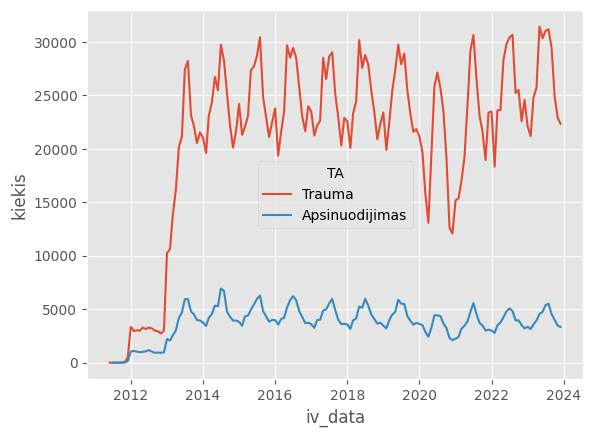

In [78]:
plotdf = paci.groupby(['iv_data', 'TA'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.lineplot(data=plotdf, x='iv_data', y='kiekis', hue='TA')
# ax.set_xlabel('Vieta')
# ax.set_ylabel('Pacientų kiekis')
# ax.set_title('Pacientų pasiskirstymas')
# for container in ax.containers:
#     ax.bar_label(container)
# plt.legend()
plt.show()

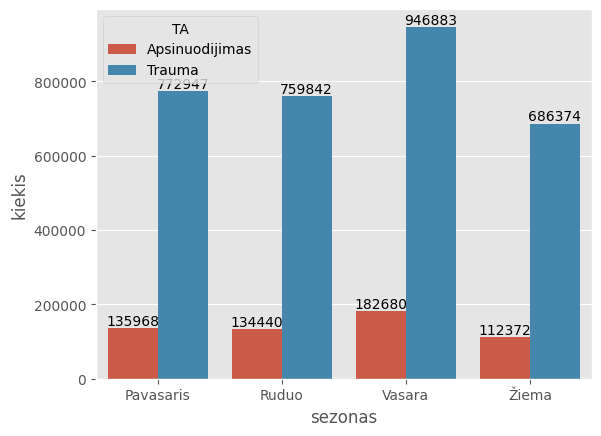

In [80]:
plotdf = paci.groupby(['sezonas', 'TA'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='sezonas', y='kiekis', hue='TA')
# ax.set_xlabel('Vieta')
# ax.set_ylabel('Pacientų kiekis')
# ax.set_title('Pacientų pasiskirstymas')
for container in ax.containers:
    ax.bar_label(container)
# plt.legend()
plt.show()

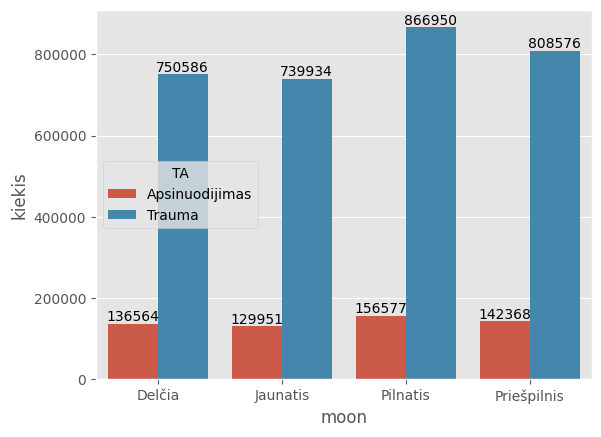

In [82]:
plotdf = paci.groupby(['moon', 'TA'])['_id'].count().reset_index(name='kiekis')
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='moon', y='kiekis', hue='TA')
# ax.set_xlabel('Vieta')
# ax.set_ylabel('Pacientų kiekis')
# ax.set_title('Pacientų pasiskirstymas')
for container in ax.containers:
    ax.bar_label(container)
# plt.legend()
plt.show()

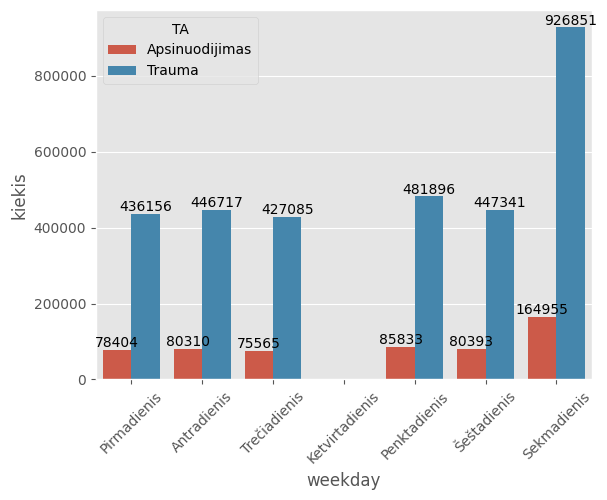

In [85]:
plotdf = paci.groupby(['weekday', 'TA'])['_id'].count().reset_index(name='kiekis')

weekday_order = ['Pirmadienis', 'Antradienis', 'Trečiadienis', 'Ketvirtadienis', 'Penktadienis', 'Šeštadienis', 'Sekmadienis']
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='weekday', y='kiekis', hue='TA', order=weekday_order)
# ax.set_xlabel('Vieta')
# ax.set_ylabel('Pacientų kiekis')
# ax.set_title('Pacientų pasiskirstymas')
ax.tick_params(axis='x', rotation=45)
for container in ax.containers:
    ax.bar_label(container)
# plt.legend()
plt.show()

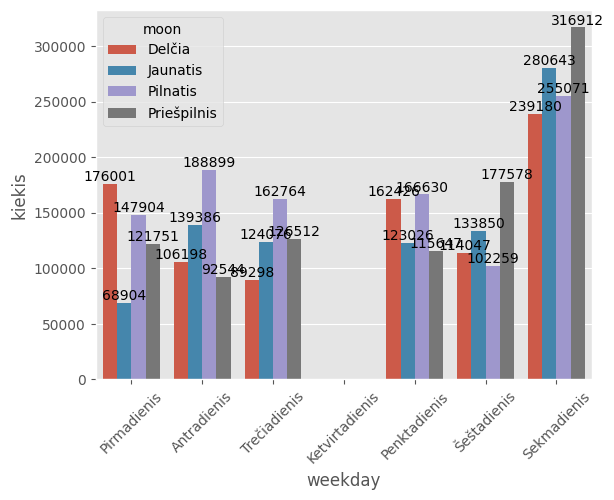

In [86]:
plotdf = paci.groupby(['weekday', 'moon'])['_id'].count().reset_index(name='kiekis')

weekday_order = ['Pirmadienis', 'Antradienis', 'Trečiadienis', 'Ketvirtadienis', 'Penktadienis', 'Šeštadienis', 'Sekmadienis']
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='weekday', y='kiekis', hue='moon', order=weekday_order)
# ax.set_xlabel('Vieta')
# ax.set_ylabel('Pacientų kiekis')
# ax.set_title('Pacientų pasiskirstymas')
ax.tick_params(axis='x', rotation=45)
for container in ax.containers:
    ax.bar_label(container)
# plt.legend()
plt.show()

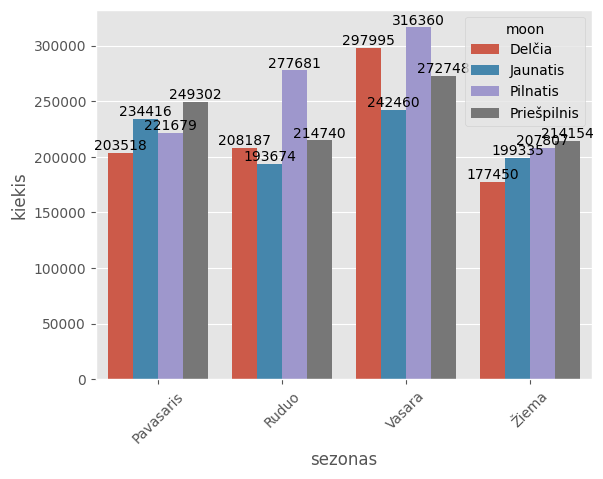

In [87]:
plotdf = paci.groupby(['sezonas', 'moon'])['_id'].count().reset_index(name='kiekis')

# weekday_order = ['Pirmadienis', 'Antradienis', 'Trečiadienis', 'Ketvirtadienis', 'Penktadienis', 'Šeštadienis', 'Sekmadienis']
fig, ax = plt.subplots()
sns.barplot(data=plotdf, x='sezonas', y='kiekis', hue='moon')
# ax.set_xlabel('Vieta')
# ax.set_ylabel('Pacientų kiekis')
# ax.set_title('Pacientų pasiskirstymas')
ax.tick_params(axis='x', rotation=45)
for container in ax.containers:
    ax.bar_label(container)
# plt.legend()
plt.show()